In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
df = pd.read_csv('bank-full.csv')

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
print(df.info())       # Data types and missing values
print(df.isnull().sum()) # Count of missing values
print(df.duplicated().sum()) # Check for duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
df.dropna(inplace=True)  # Drop rows with missing values
# OR fill missing values (if appropriate)
df.fillna("", inplace=True)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
# Updated columns to keep - removed potentially noisy features
columns_to_keep = [
    'age', 
    'duration', 
    'emp.var.rate', 
    'cons.price.idx', 
    'cons.conf.idx', 
    'euribor3m', 
    'nr.employed'
]

# Create new dataframe with cleaned features
df_cluster = df[columns_to_keep].copy()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

print(f"Using {len(columns_to_keep)} key features:")
print(columns_to_keep)

Using 7 key features:
['age', 'duration', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [13]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


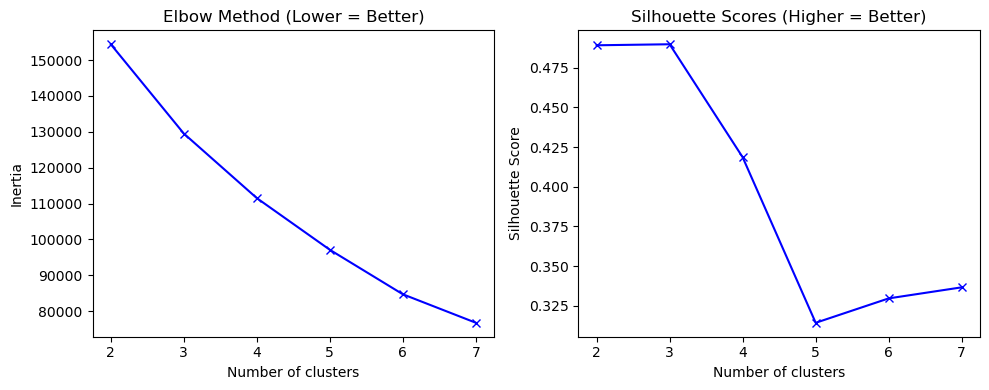

Best k by silhouette: 3
Best k by elbow method: 4

k=3 Results:
- Silhouette: 0.4898
- Inertia: 129514.46


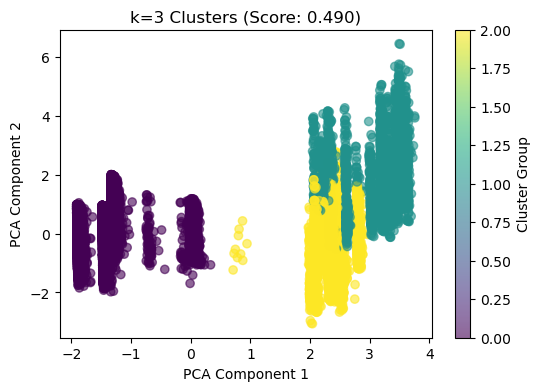

Cluster sizes: {0: 27672, 1: 2877, 2: 10627}

k=4 Results:
- Silhouette: 0.4186
- Inertia: 111498.82


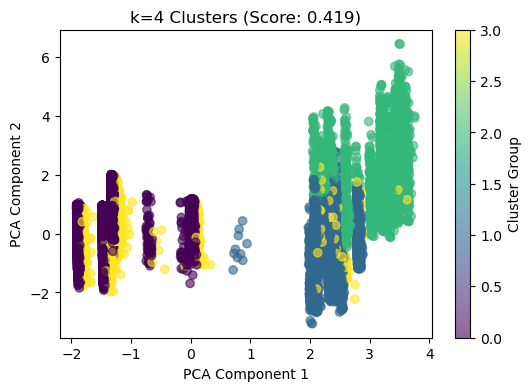

Cluster sizes: {0: 24794, 1: 10552, 2: 2842, 3: 2988}

k=3 Results:
- Silhouette: 0.4898
- Inertia: 129514.46


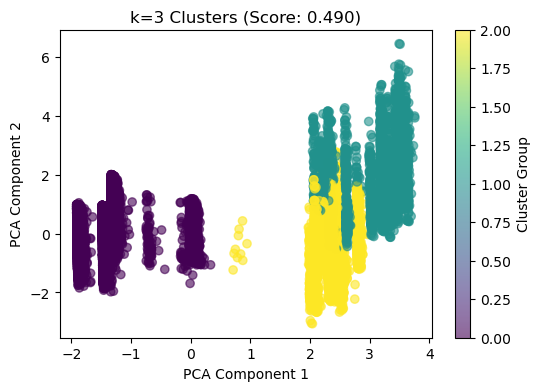

Cluster sizes: {0: 27672, 1: 2877, 2: 10627}


In [14]:
# Determine optimal number of clusters using elbow method and silhouette analysis
#Inertia in K-means is like a "tightness score" for your clusters. It adds up how far each point is from the center of its cluster.
#if points are close to their center (tight clusters), inertia is low; if they're spread out (loose clusters), inertia is high.
inertia = [] 

#The K-means Silhouette Score is a number between -1 and 1 that tells you:
#Close to 1 → Clusters are well-separated and tight (good).
#Around 0 → Clusters overlap (weak grouping).
#Negative → Points may be in wrong clusters (bad).
silhouette_scores = []

k_range = range(2, 8)  

#tests different numbers of clusters (k) and stores their quality scores (inertia & silhouette) to find the optimal k.
for k in k_range:
    # Run K-means for each cluster count
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(X_scaled)
    
    # Store results
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# 2. Plot evaluation metrics
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method (Lower = Better)')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores (Higher = Better)')
plt.tight_layout()
plt.show()

# 3. Get optimal k values
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]  # Best silhouette score
optimal_k_elbow = 4  # From where the elbow plot bends

print(f"Best k by silhouette: {optimal_k_silhouette}")
print(f"Best k by elbow method: {optimal_k_elbow}")

# 4. Evaluate both options
for k in [optimal_k_silhouette, optimal_k_elbow, 3]:  
    kmeans = KMeans(n_clusters=k, n_init=30, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    # Print metrics
    print(f"\nk={k} Results:")
    print(f"- Silhouette: {silhouette_score(X_scaled, labels):.4f}")
    print(f"- Inertia: {kmeans.inertia_:.2f}")
    
    # Visualize clusters
    pca = PCA(n_components=2).fit(X_scaled)
    X_pca = pca.transform(X_scaled)
    
    plt.figure(figsize=(6, 4))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.title(f'k={k} Clusters (Score: {silhouette_score(X_scaled, labels):.3f})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Group')
    plt.show()

    # Show cluster sizes
    unique, counts = np.unique(labels, return_counts=True)
    print("Cluster sizes:", dict(zip(unique, counts)))

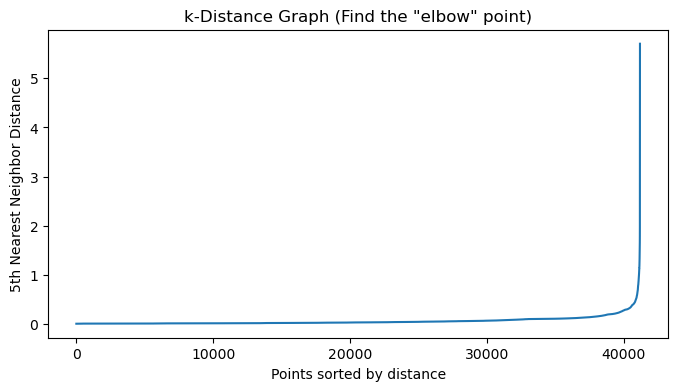


DBSCAN Results:
- Number of clusters found: 2
- Number of noise points: 9
- Estimated clusters: [-1  0  1]
- Silhouette Score: 0.5540


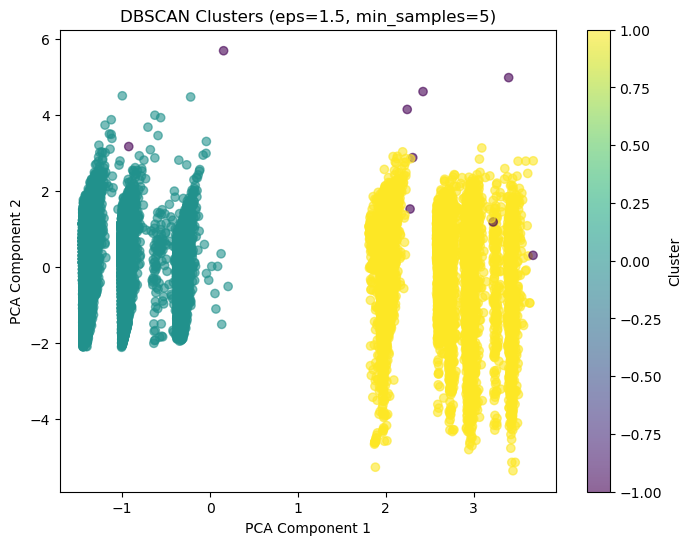

In [15]:
# 1. Feature Selection for DBSCAN (Recommended)
dbscan_features = ['age', 'duration', 'emp.var.rate', 'euribor3m', 'nr.employed']
X_dbscan = df[dbscan_features].copy()

# 2. Scale the data (All the numbers are adujusted to the same scale) (crucial for DBSCAN)
from sklearn.preprocessing import StandardScaler
X_dbscan_scaled = StandardScaler().fit_transform(X_dbscan)

# 3. Find optimal eps using k-distance graph
nn = NearestNeighbors(n_neighbors=5).fit(X_dbscan_scaled)
distances, _ = nn.kneighbors(X_dbscan_scaled)
distances = np.sort(distances[:, -1], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title('k-Distance Graph (Find the "elbow" point)')
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.show()

# 4. Grouping Similar Points (DBSCAN), At least 5 points (min_samples=5, eps=1.5)
dbscan = DBSCAN(eps=1.5, min_samples=5)  
labels = dbscan.fit_predict(X_dbscan_scaled)

# 5. Evaluate results
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"\nDBSCAN Results:")
print(f"- Number of clusters found: {n_clusters}")
print(f"- Number of noise points: {n_noise}")
print(f"- Estimated clusters: {np.unique(labels)}")

if n_clusters > 1:
    print(f"- Silhouette Score: {silhouette_score(X_dbscan_scaled, labels):.4f}")
else:
    print("- Couldn't calculate silhouette score (only 1 cluster)")

# 6. Visualize clusters (2D PCA)
pca = PCA(n_components=2).fit(X_dbscan_scaled)
X_pca = pca.transform(X_dbscan_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title(f'DBSCAN Clusters (eps=1.5, min_samples=5)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


Clustering Algorithm Comparison:
K-means (k=3) Silhouette Score: 0.4898
K-means (k=4) Silhouette Score: 0.4186
K-means (k=3) Silhouette Score: 0.4898

DBSCAN Results (eps=1.5, min_samples=5):
- Silhouette Score: 0.5540
- Number of clusters: 2
- Outliers/Noise points: 9


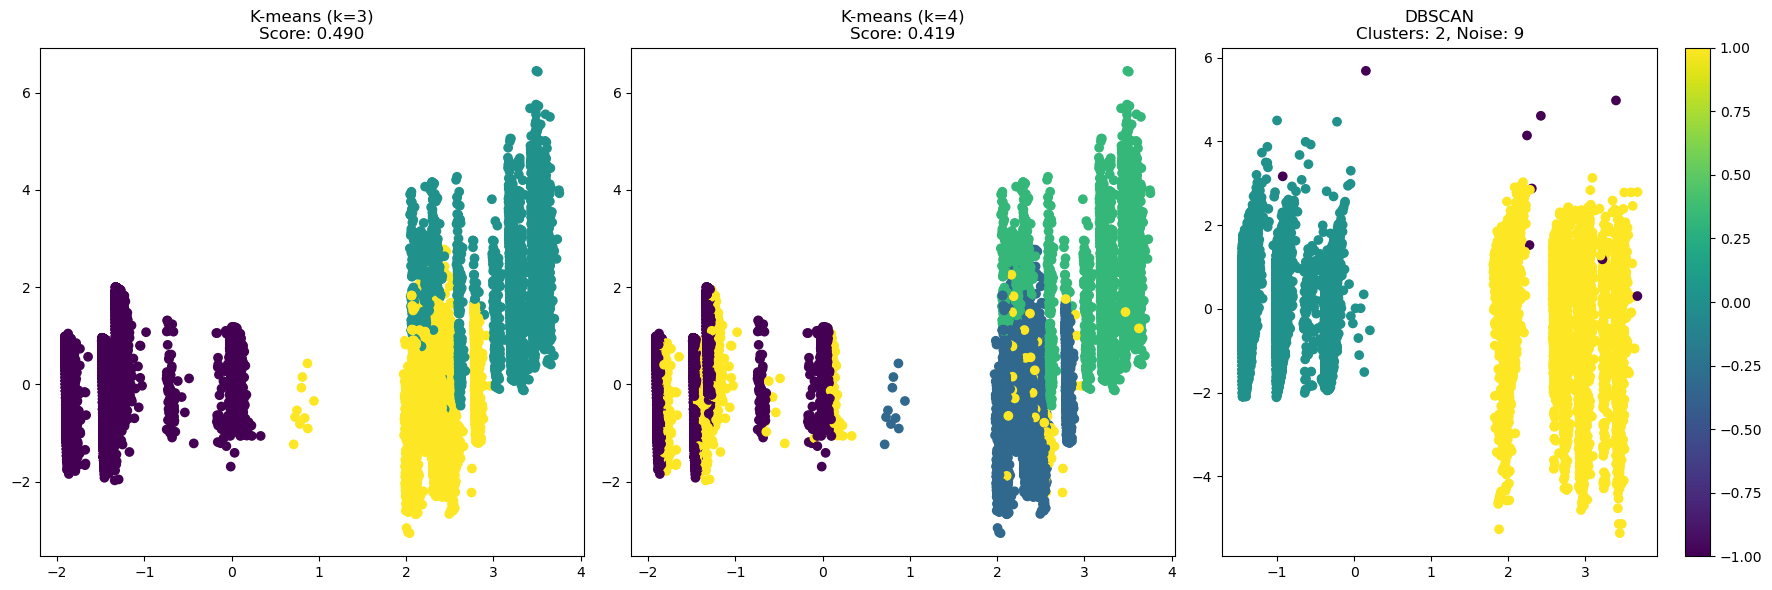

In [16]:
# Now the comparison code can run properly
print("\nClustering Algorithm Comparison:")

# K-means with optimal silhouette k
kmeans_silhouette = KMeans(n_clusters=optimal_k_silhouette, n_init=20, random_state=42)
kmeans_silhouette.fit(X_scaled)

# K-means with optimal elbow k
kmeans_elbow = KMeans(n_clusters=optimal_k_elbow, n_init=20, random_state=42)
kmeans_elbow.fit(X_scaled)

# K-means with k=3
kmeans_selected = KMeans(n_clusters=3, n_init=20, random_state=42)
kmeans_selected.fit(X_scaled)

print(f"K-means (k={optimal_k_silhouette}) Silhouette Score: {silhouette_score(X_scaled, kmeans_silhouette.labels_):.4f}")
print(f"K-means (k={optimal_k_elbow}) Silhouette Score: {silhouette_score(X_scaled, kmeans_elbow.labels_):.4f}")
print(f"K-means (k=3) Silhouette Score: {silhouette_score(X_scaled, kmeans_selected.labels_):.4f}")

# DBSCAN implementation
dbscan_features = ['age', 'duration', 'emp.var.rate', 'euribor3m', 'nr.employed']
X_dbscan = df[dbscan_features]
X_dbscan_scaled = StandardScaler().fit_transform(X_dbscan)

dbscan = DBSCAN(eps=1.5, min_samples=5)  
dbscan_labels = dbscan.fit_predict(X_dbscan_scaled)

n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
if n_clusters_dbscan > 1:
    print(f"\nDBSCAN Results (eps=1.5, min_samples=5):")
    print(f"- Silhouette Score: {silhouette_score(X_dbscan_scaled, dbscan_labels):.4f}")
    print(f"- Number of clusters: {n_clusters_dbscan}")
    print(f"- Outliers/Noise points: {list(dbscan_labels).count(-1)}")
else:
    print("\nDBSCAN found only noise or one cluster. Try adjusting eps/min_samples.")

# Visualization
pca = PCA(n_components=2)
X_pca_all = pca.fit_transform(X_scaled)  # For K-means
X_pca_dbscan = pca.fit_transform(X_dbscan_scaled)  # For DBSCAN

plt.figure(figsize=(18, 6))

# K-means (Silhouette-optimal)
plt.subplot(1, 3, 1)
plt.scatter(X_pca_all[:, 0], X_pca_all[:, 1], c=kmeans_silhouette.labels_, cmap='viridis')
plt.title(f'K-means (k={optimal_k_silhouette})\nScore: {silhouette_score(X_scaled, kmeans_silhouette.labels_):.3f}')

# K-means (Elbow-optimal)
plt.subplot(1, 3, 2)
plt.scatter(X_pca_all[:, 0], X_pca_all[:, 1], c=kmeans_elbow.labels_, cmap='viridis')
plt.title(f'K-means (k={optimal_k_elbow})\nScore: {silhouette_score(X_scaled, kmeans_elbow.labels_):.3f}')

# DBSCAN
plt.subplot(1, 3, 3)
dbscan_plot = plt.scatter(X_pca_dbscan[:, 0], X_pca_dbscan[:, 1], c=dbscan_labels, cmap='viridis')
plt.title(f'DBSCAN\nClusters: {n_clusters_dbscan}, Noise: {list(dbscan_labels).count(-1)}')
plt.colorbar(dbscan_plot)

plt.tight_layout()
plt.show()